In [2]:
# import psycopg2
# from y import create_engine
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import time
import fiona
from osgeo import gdal

------------------

In [3]:
general_path = 'E:\paper2_analysis/traffic_analysis/Omnitrans_denHelder'
figures_path = f'{general_path}/figures'
input_path = f'{general_path}/input'
output_path = f'{general_path}/output'

# E:\paper2_analysis\traffic_analysis\Omnitrans_denHelder\input

-----------------------------

### zonal data

<AxesSubplot:>

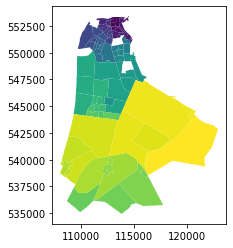

In [4]:
#from cbs data
buurten_all_centroids = gpd.read_file(f'{input_path}/buurten_centroids.shp')
buurten_all_vlak = gpd.read_file(f'{input_path}/buurten_vlak.shp')
buurten_all_vlak.plot(column="id_new")

In [5]:
buurten_OD_info =  buurten_all_vlak[['id_new', 'BU_NAAM', 'AANTAL_HH']]
print(len(buurten_OD_info))
buurten_OD_info.head(2)

79


,id_new,BU_NAAM,AANTAL_HH
0,1,Oostsloot,650.0
1,2,Centrum,870.0


In [6]:
totaal_hh = buurten_OD_info.AANTAL_HH.sum()
totaal_hh

34680.0

--------

### SELECT ZONES FOR DEPARTURE

In [8]:
# selection_area = 'Den Helder'
# selection_area = 'Julianadorp'
# selection_area = "flooddepth_>2.5m"
# selection_area = "free_selection"
# selection_area = 'everyone'
selection_area = 'zuidrand_denhelder'


----------------

### zuidrand

In [10]:
## load selection made in 
if selection_area == 'zuidrand_denhelder':
    print('zuidrand_denhelder selected')
    
    buurtSelect= gpd.read_file(f'{input_path}/zuidrand_denhelder.shp')
    buurtSelect = buurtSelect[['id_new', 'BU_NAAM', 'AANTAL_HH']]
    
    print(f'{len(buurtSelect)} zones selected')
else:
    print("zuidrand_denhelder not selected")

zuidrand_denhelder selected
16 zones selected


### everyone

In [11]:
## load selection made in 
if selection_area == 'everyone':
    print('entire area is selected')
    
    buurtSelect= gpd.read_file(f'{input_path}/buurten_centroids.shp')
    buurtSelect = buurtSelect[['id_new', 'BU_NAAM', 'AANTAL_HH']]
    
    print(f'{len(buurtSelect)} zones are selected')
else:
    print("not entire area")

not entire area


### free selection

In [12]:
## load selection made in 
if selection_area == 'free_selection':
    print('free_selection made')
    
    buurtSelect= gpd.read_file(f'{input_path}/free_selection2.shp')
    buurtSelect = buurtSelect[['id_new', 'BU_NAAM', 'AANTAL_HH']]
    
    print(f'{len(buurtSelect)} zones selected')
else:
    print("free_selection not made")

free_selection not made


#### DEN HELDER ONLY


In [13]:
## load selection made in 
if selection_area == 'Den Helder':
    print('Den Helder selected')
    
    buurtSelect= gpd.read_file(f'{input_path}/DenHelder_only.shp')
    buurtSelect = buurtSelect[['id_new', 'BU_NAAM', 'AANTAL_HH']]
    
    print(f'{len(buurtSelect)} zones selected')
else:
    print("den helder not selected")

den helder not selected


### juliadorp only

In [14]:
## load selection 
if selection_area == 'Julianadorp':
    print('Julianadorp ')
    buurtSelect = gpd.read_file(f'{input_path}/Julianadorp_only.shp')
    buurtSelect = buurtSelect[['id_new', 'BU_NAAM', 'AANTAL_HH']]

    print(f'{len(buurtSelect)} zones selected')
else:
    print("julianadorp not selected")

julianadorp not selected


### selection based on flood depth

In [15]:
## load selection 

if selection_area == 'flooddepth_>2m':
    print('flood depth selection_area')
    buurtSelect = gpd.read_file(f'{input_path}/maxdepth_larger2.shp')
    buurtSelect = buurtSelect[['id_new', 'BU_NAAM', 'AANTAL_HH']]

    print(f'{len(buurtSelect)} zones selected')
    print(f'{buurtSelect.AANTAL_HH.sum()} HH selected')
else:
    print("flooddepth areas not selected")

flooddepth areas not selected


-----------------

## result selection

In [16]:
list_id_in_selection = buurtSelect.id_new.values
print(f'total nr of selected zones: {len(list_id_in_selection)}')
print(list_id_in_selection)

total nr of selected zones: 16
[21 23 26 27 29 30 31 32 33 34 35 36 37 38 39 40]


------------------------------

### create list zones for OD based on selection

In [17]:
OD_list = buurten_OD_info.copy()

#als id buurten niet in id select zit, dan waarde aanpassen naar nul
for index, row in OD_list.iterrows():
    if row.id_new not in list_id_in_selection:
        OD_list.loc[index,"AANTAL_HH"] = 0
        
OD_list.to_csv(f'{input_path}/OD_selection.csv', header= True, sep =';', decimal=',' )
print(f'{OD_list.AANTAL_HH.sum()} aantal huishoudens')

8235.0 aantal huishoudens


In [18]:
## CREATE LIST OF Origns NOT in selection
OD_list_notselected = buurten_OD_info.copy()

#als id buurten WEL id select zit, dan waarde aanpassen naar nul
for index, row in OD_list_notselected.iterrows():
    if row.id_new in list_id_in_selection:
        OD_list_notselected.loc[index,"AANTAL_HH"] = 0


OD_list_notselected.to_csv(f'{input_path}/OD_NOTinselection.csv', header= True, sep =';', decimal=',' )
print(f'{OD_list_notselected.AANTAL_HH.sum()} aantal huishoudens - buiten selection')

26445.0 aantal huishoudens - buiten selection


In [19]:
# check 
total_selected = OD_list.AANTAL_HH.sum()
total_outside_selection = OD_list_notselected.AANTAL_HH.sum()
total_check = total_selected + total_outside_selection
total_check == totaal_hh

True

In [20]:
print(f'total householdes in area: {totaal_hh}')
print(f'total hh selected: {total_selected}')
print(f'total hh outside selection: {total_outside_selection}')

total householdes in area: 34680.0
total hh selected: 8235.0
total hh outside selection: 26445.0
